# Lab 3: Bayes Classifier and Boosting

## Jupyter notebooks

In this lab, you can use Jupyter <https://jupyter.org/> to get a nice layout of your code and plots in one document. However, you may also use Python as usual, without Jupyter.

If you have Python and pip, you can install Jupyter with `sudo pip install jupyter`. Otherwise you can follow the instruction on <http://jupyter.readthedocs.org/en/latest/install.html>.

And that is everything you need! Now use a terminal to go into the folder with the provided lab files. Then run `jupyter notebook` to start a session in that folder. Click `lab3.ipynb` in the browser window that appeared to start this very notebook. You should click on the cells in order and either press `ctrl+enter` or `run cell` in the toolbar above to evaluate all the expressions.

Be sure to put `%matplotlib inline` at the top of every code cell where you call plotting functions to get the resulting plots inside the document.

## Import the libraries

In Jupyter, select the cell below and press `ctrl + enter` to import the needed libraries.
Check out `labfuns.py` if you are interested in the details.

In [1]:
import zipfile
with zipfile.ZipFile("lab3.zip", 'r') as zip_ref:
    zip_ref.extractall("")

In [2]:
%matplotlib inline

import numpy as np
from scipy import misc
from imp import reload
from labfuns import *
import random

## Bayes classifier functions to implement

The lab descriptions state what each function should do.

In [3]:
# NOTE: you do not need to handle the W argument for this part!
# in: labels - N vector of class labels
# out: prior - C x 1 vector of class priors
def computePrior(labels, W=None):
    Npts = labels.shape[0]
    if W is None:
        W = np.ones((Npts,1))/Npts
    else:
        assert(W.shape[0] == Npts)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    prior = np.zeros((Nclasses,1))

    # TODO: compute the values of prior for each class!
    for idx, k in enumerate(classes):
        k_point_indexes = np.where(labels == k)
        current_w = np.array(W[k_point_indexes, :])
        
        prior[idx] = np.sum(current_w)

    return prior

# NOTE: you do not need to handle the W argument for this part!
# in:      X - N x d matrix of N data points
#     labels - N vector of class labels
# out:    mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
def mlParams(X, labels, W=None):
    assert(X.shape[0]==labels.shape[0])
    Npts, Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    if W is None:
        W = np.ones((Npts,1))/float(Npts)

    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))

    # TODO: fill in the code to compute mu and sigma!
    # ==========================
    for idx, k in enumerate(classes):
        k_point_indexes = np.where(labels == k)[0]
        k_points = np.array(X[k_point_indexes, :])
        current_w = np.array(W[k_point_indexes, :])
        k_sum = np.sum(np.multiply(current_w, k_points), axis=0)
        k_size = np.size(k_points, 0)
        # mu
        current_mu = k_sum / np.sum(current_w)
        mu[idx] = current_mu
        # sigma
        eq_square = np.multiply(current_w, np.square(k_points - current_mu))
        sum = eq_square.sum(axis=0)
        current_sigma = (1./np.sum(current_w)) * sum
        # creates a matrix having the values in its diagonal
        diag = np.diag(current_sigma)
        sigma[idx] = diag
    # ==========================

    return mu, sigma

# in:      X - N x d matrix of M data points
#      prior - C x 1 matrix of class priors
#         mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
# out:     h - N vector of class predictions for test points
def classifyBayes(X, prior, mu, sigma):

    Npts = X.shape[0]
    Nclasses,Ndims = np.shape(mu)
    logProb = np.zeros((Nclasses, Npts))

    # TODO: fill in the code to compute the log posterior logProb!
    # ==========================
    for idx in range(Nclasses):
        determinant = np.linalg.det(sigma[idx])
        first_part = -0.5*np.log(determinant)
        third_part = np.log(prior[idx])[0]

        x_mu_sub = np.subtract(X, mu[idx])                      # Npts * Ndim
        result = np.dot(x_mu_sub, np.linalg.inv(sigma[idx]))    # Ndim * Ndim
        result = np.dot(result, np.transpose(x_mu_sub))         # Npts * Npts 
        second_part = -0.5*result.diagonal()                    # Npts * 1

        logProb[idx] = first_part + second_part + third_part
    # ==========================
    
    # one possible way of finding max a-posteriori once
    # you have computed the log posterior
    h = np.argmax(logProb,axis=0)
    return h

ML-Mean: [[0.95518927 4.42431434]
 [1.9065645  0.77295814]]

ML-Covariance: [[[1.01671184 0.        ]
  [0.         0.99078937]]

 [[0.92300909 0.        ]
  [0.         0.85643528]]]



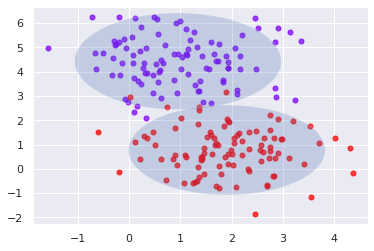

In [4]:
X, labels = genBlobs(centers=2)
mu, sigma = mlParams(X, labels)

print(f"ML-Mean: {mu}\n")
print(f"ML-Covariance: {sigma}\n")

# plot the Gaussian
plotGaussian(X, labels, mu, sigma)

In [5]:
prior = computePrior(labels)
print(prior)

[[0.5]
 [0.5]]


The implemented functions can now be summarized into the `BayesClassifier` class, which we will use later to test the classifier, no need to add anything else here:

In [6]:
classifyBayes(X, prior, mu, sigma)

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0])

In [7]:
# NOTE: no need to touch this
class BayesClassifier(object):
    def __init__(self):
        self.trained = False

    def trainClassifier(self, X, labels, W=None):
        rtn = BayesClassifier()
        rtn.prior = computePrior(labels, W)
        rtn.mu, rtn.sigma = mlParams(X, labels, W)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBayes(X, self.prior, self.mu, self.sigma)

## Test the Maximum Likelihood estimates

Call `genBlobs` and `plotGaussian` to verify your estimates.

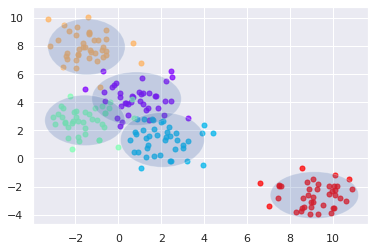

In [8]:
%matplotlib inline

X, labels = genBlobs(centers=5)
mu, sigma = mlParams(X,labels)
plotGaussian(X,labels,mu,sigma)

## Assignment 3

Call the `testClassifier` and `plotBoundary` functions for this part.

In [61]:
testClassifier(BayesClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 84.4
Trial: 10 Accuracy 95.6
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 86.7
Trial: 40 Accuracy 88.9
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 86.7
Trial: 70 Accuracy 91.1
Trial: 80 Accuracy 86.7
Trial: 90 Accuracy 91.1
Final mean classification accuracy  89 with standard deviation 4.16


In [62]:
testClassifier(BayesClassifier(), dataset='vowel', split=0.7)

Trial: 0 Accuracy 61
Trial: 10 Accuracy 66.2
Trial: 20 Accuracy 74
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 64.3
Trial: 60 Accuracy 66.9
Trial: 70 Accuracy 63.6
Trial: 80 Accuracy 62.3
Trial: 90 Accuracy 70.8
Final mean classification accuracy  64.7 with standard deviation 4.03


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

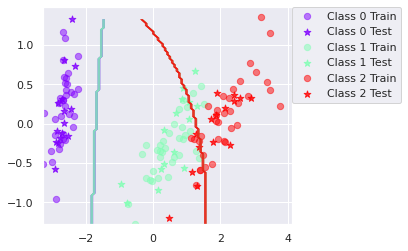

In [11]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='iris',split=0.7)

### Answer the following questions:
> (1) When can a feature independence assumption be reasonable and when not?

Two event are independent if the joint distribution can be factorized. Which means, B happening tells us nothing about A happening.

>(2) How does the decision boundary look for the Iris dataset? How could one improve the classification results for this scenario by changing classifier or, alternatively, manipulating the data?

This dataset has 3 different classes. Looking at the above plot, we can see that one of the classes is easily separable from the others even with a line, while the remaining two are not. So using classes that are separable will improve the classification result. Choosing attributes that are really different between class 1 and class 2 can also improve our model. Because this is not always possible, we can also change the classifier to a more complex one that can fit the data less smoothly. Therefore, we could use a single decision tree that can distinguish more than 2 classes at the same time and by nature has a high variance.

## Boosting functions to implement

The lab descriptions state what each function should do.

In [12]:
X, labels = genBlobs(centers=2)

weights = np.ones((len(labels),1))/float(len(labels))
mu, sigma = mlParams(X, labels, weights)
print(mu)
print(sigma)

[[0.95518927 4.42431434]
 [1.9065645  0.77295814]]
[[[1.01671184 0.        ]
  [0.         0.99078937]]

 [[0.92300909 0.        ]
  [0.         0.85643528]]]


In [54]:
# in: base_classifier - a classifier of the type that we will boost, e.g. BayesClassifier
#                   X - N x d matrix of N data points
#              labels - N vector of class labels
#                   T - number of boosting iterations
# out:    classifiers - (maximum) length T Python list of trained classifiers
#              alphas - (maximum) length T Python list of vote weights
def trainBoost(base_classifier, X, labels, T=10):
    # these will come in handy later on
    Npts, Ndims = np.shape(X)

    classifiers = [] # append new classifiers to this list
    alphas = [] # append the vote weight of the classifiers to this list

    # The weights for the first iteration
    wCur = np.ones((Npts,1))/float(Npts)

    for i_iter in range(0, T):
        # a new classifier can be trained like this, given the current weights
        classifiers.append(base_classifier.trainClassifier(X, labels, wCur))

        # do classification for each point
        vote = classifiers[-1].classify(X)  # vote = result of function h

        # TODO: Fill in the rest, construct the alphas etc.
        # ==========================
        # delta function

        # true if the vote is correct, false otherwise
        vote_correct = np.reshape((vote == labels), (Npts, 1))
        # 1 if the vote is correct, 0 otherwise
        vote_sign = np.where(vote_correct == True, 1, 0)

        # weighted error
        error = np.multiply(wCur, 1-vote_sign)
        # add an epsilon to avoid division by 0
        sum_error = np.sum(error) + 1e-20
        # calculate alpha
        alpha = 0.5 * (np.log(1 - sum_error) - np.log(sum_error))
        alphas.append(alpha) # you will need to append the new alpha

        # -1 if the vote is correct, 1 otherwise
        exp_sign = np.where(vote_correct == True, -1.0, 1.0)
        norm_factor = np.sum(wCur)
        # update weights
        wCur = wCur * np.exp(exp_sign * alpha)
        wCur /= norm_factor
        # ==========================
        
    return classifiers, alphas

# in:       X - N x d matrix of N data points
# classifiers - (maximum) length T Python list of trained classifiers as above
#      alphas - (maximum) length T Python list of vote weights
#    Nclasses - the number of different classes
# out:  yPred - N vector of class predictions for test points
def classifyBoost(X, classifiers, alphas, Nclasses):
    Npts = X.shape[0]
    Ncomps = len(classifiers)

    # if we only have one classifier, we may just classify directly
    if Ncomps == 1:
        return classifiers[0].classify(X)
    else:
        votes = np.zeros((Npts,Nclasses))

        num_classifiers = len(alphas)
        classifications = np.zeros((num_classifiers, Npts))

        for t in range(num_classifiers):
            alpha = alphas[t]
            classification = classifiers[t].classify(X)
            classifications[t] = classification
        
        for i in range(len(X)):
            for t in range(num_classifiers):
                pred_class = int(classifications[t][i])
                votes[i][pred_class] += alphas[t]

        # one way to compute yPred after accumulating the votes
        return np.argmax(votes, axis=1)

In [55]:
"""classifiers, alphas = trainBoost(BayesClassifier, X, labels)
print(" --- ALPHAS ---\n")
print(alphas)
print("\n\n --- CLASSIFY BOOST ---\n")
classifyBoost(X, classifiers, alphas, 2)"""

'classifiers, alphas = trainBoost(BayesClassifier, X, labels)\nprint(" --- ALPHAS ---\n")\nprint(alphas)\nprint("\n\n --- CLASSIFY BOOST ---\n")\nclassifyBoost(X, classifiers, alphas, 2)'

The implemented functions can now be summarized another classifer, the `BoostClassifier` class. This class enables boosting different types of classifiers by initializing it with the `base_classifier` argument. No need to add anything here.

In [56]:
# NOTE: no need to touch this
class BoostClassifier(object):
    def __init__(self, base_classifier, T=10):
        self.base_classifier = base_classifier
        self.T = T
        self.trained = False

    def trainClassifier(self, X, labels):
        rtn = BoostClassifier(self.base_classifier, self.T)
        rtn.nbr_classes = np.size(np.unique(labels))
        rtn.classifiers, rtn.alphas = trainBoost(self.base_classifier, X, labels, self.T)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBoost(X, self.classifiers, self.alphas, self.nbr_classes)

## Assignment 5: Run some experiments

Call the `testClassifier` and `plotBoundary` functions for this part.

In [57]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 97.8
Trial: 20 Accuracy 91.1
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 95.6
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 91.1
Trial: 70 Accuracy 97.8
Trial: 80 Accuracy 95.6
Trial: 90 Accuracy 91.1
Final mean classification accuracy  94.6 with standard deviation 2.93


In [59]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 76
Trial: 10 Accuracy 85.1
Trial: 20 Accuracy 79.9
Trial: 30 Accuracy 79.9
Trial: 40 Accuracy 76
Trial: 50 Accuracy 76.6
Trial: 60 Accuracy 84.4
Trial: 70 Accuracy 81.8
Trial: 80 Accuracy 81.2
Trial: 90 Accuracy 79.2
Final mean classification accuracy  79.8 with standard deviation 3.33


Naive Bayes:


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

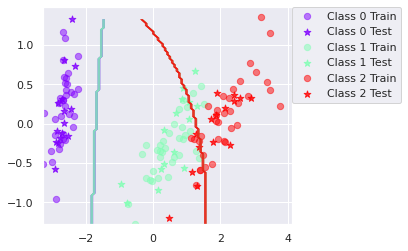

Boosted Bayes:


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

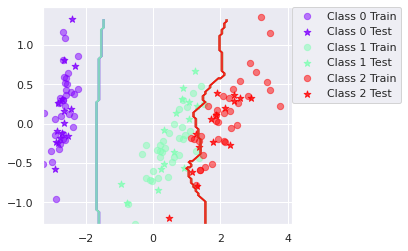

In [60]:
%matplotlib inline
print("Naive Bayes:")
plotBoundary(BayesClassifier(), dataset='iris',split=0.7)
print("Boosted Bayes:")
plotBoundary(BoostClassifier(BayesClassifier()), dataset='iris',split=0.7)

### Bayes classifiers

> (1) Is there any improvement in classification accuracy?  Why/why not?

Yes there is! 

| Dataset | NBayes | With Boost |
| ------- | ------------- | ---------- |
| iris    | 89%   | 94.6% |
| vowel   | 64.7% | 79.8% |

They are better because we are creating multiple models and using weights on the worse models to compute better ones next. So, for each model, we calculate the error (dependent on the number of points that were misclassified) and give the misclassified points a higher weight so that the following model is forced to fit those points better. 

> (2) Plot the decision boundary of the boosted classifier on iris and compare it with that of the basic. What differences do you notice? Is the boundary of the boosted version more complex?

We notice that the first model was much smoother, and therefore much more general. Separating the purple class from others can be done easily with a line, so even the first model was able to do that. But the green and the red classes require a more complex hyperplane to separate with. The naive solution was not able to model that (due to its high bias / low variance nature). The boosted version reduces the bias by incorporating different models which take into consideration the previous models' errors. This enforces that these models fit the data in a different way, increasing the efficiency of the overal fit.

> (3) Can we make up for not using a more advanced model in the basic classifier (e.g. independent features) by using boosting?

In our opinion, yes. Even by using the same predictors, the boosting algorithm enforces the models to differ from others by modeling their erroroneus points more closely. This by itself pushes the following models to differ from each other.


## Assignment 6

Now repeat the steps with a decision tree classifier.

In [63]:
testClassifier(DecisionTreeClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 91.1
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 88.9
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 88.9
Final mean classification accuracy  92.4 with standard deviation 3.71


In [64]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 93.3
Trial: 10 Accuracy 100
Trial: 20 Accuracy 97.8
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 95.6
Trial: 50 Accuracy 95.6
Trial: 60 Accuracy 93.3
Trial: 70 Accuracy 93.3
Trial: 80 Accuracy 95.6
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.6 with standard deviation 3.59


In [65]:
testClassifier(DecisionTreeClassifier(), dataset='vowel',split=0.7)

Trial: 0 Accuracy 63.6
Trial: 10 Accuracy 68.8
Trial: 20 Accuracy 63.6
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 63
Trial: 60 Accuracy 59.7
Trial: 70 Accuracy 68.8
Trial: 80 Accuracy 59.7
Trial: 90 Accuracy 68.2
Final mean classification accuracy  64.1 with standard deviation 4


In [66]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 86.4
Trial: 10 Accuracy 88.3
Trial: 20 Accuracy 89.6
Trial: 30 Accuracy 92.2
Trial: 40 Accuracy 81.8
Trial: 50 Accuracy 86.4
Trial: 60 Accuracy 85.1
Trial: 70 Accuracy 90.3
Trial: 80 Accuracy 85.7
Trial: 90 Accuracy 90.3
Final mean classification accuracy  86.8 with standard deviation 2.59


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

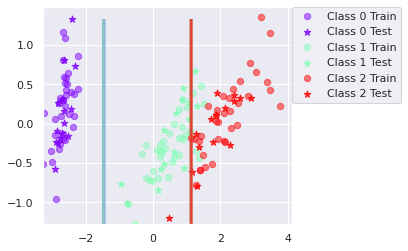

In [67]:
%matplotlib inline
plotBoundary(DecisionTreeClassifier(), dataset='iris',split=0.7)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

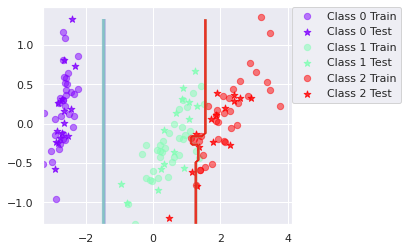

In [69]:
%matplotlib inline
plotBoundary(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

### Decision trees

> (1) Is there any improvement in classification accuracy?  Why/why not?

Yes there is. Below are the accuracies of the decision trees.

| Dataset | DTree | With Boost |
| ------- | ------------- | ---------- |
| iris    | 92.4%   | 94.6% |
| vowel   | 64.1% | 86.8% |

For fair comparison, we also include the accuracies of the Bayes models.

| Dataset | NBayes | With Boost |
| ------- | ------------- | ---------- |
| iris    | 89%   | 94.6% |
| vowel   | 64.7% | 79.8% |

It looks like that by nature, decision trees cope better with the provided Iris data than the Bayes classifiers do. In our opinion, this is because the decision trees have generally higher variance, which makes easier to fit the data. A single, really simple decision tree could model the Iris dataset relatively well - boosting lead to an additional `2.2%` accuracy improvement - which is not that much as boosting primarily helps with high bias models. While in the case of the Bayes classifiers (higher bias), boosting could improve the base performance by `5.6%`.

The Vowels dataset has more instances (more than 500 records compared to 150 in iris) and predictors (10 compared to 4 in iris). This is harder to model with a simple decision tree, because there are more correlations between the attributes which can be harder to model correctly with a single high-variance algorithm. This is why here the naive Bayes model outperforms the simple decision tree. And this is also why the boosted tree improves by `22.7%` compared to `15.1%` of Bayes (despite the fact that boosting generally helps more with high bias models).

> (2) Plot the decision boundary of the boosted classifier on Iris and compare it with that of the basic. What differences do you notice? Is the boundary of the boosted version more complex?

The first tree basically models the Iris data with two vertical lines. The boosted version fits the dataset much closer (as expected). What is worth to mention that while the boosted and the simple Bayes both tries to find a curvative boundary, decision trees use more elongated lines.

> (3) Can we make up for not using a more advanced model in the basic classifier (e.g. independent features) by using boosting?

In our opinion, yes. Even by using the same predictors, the boosting algorithm enforces the models to differ from others by modeling their erroroneus points more closely. This by itself pushes the following models to differ from each other.

## Assignment 7
> If you had to pick a classifier, naive Bayes or a decision tree or
the boosted versions of these, which one would you pick? Motivate from the following criterias.

- outliers: the Bayes model should be better because the variance is lower than in a decision tree (which typically has an overfitting nature). So while a decision tree would try to fit all of the points, the Bayes model simply wouldn't be able to do so.

- irrelevant inputs: in a Bayes model, for an irrelevant attribute, each value of the attribute will be equally distributed by all of the classes (assuming that we have a good dataset), due to the independence assumption. In a decision tree, this might also be the case since the algorithm tries to choose the attributes with the lowest entropies (highest information gain). However, depending on the feature selection, a decision tree might end up choosing an irrelevant feature as a classifier due to the dependency inside a branch, therefore modelling accidental correlations.

- predictive power: It seems like that for a small amount of attributes, the predictive power of the decision tree is stronger. When the number of predictors increase, the Bayesian approach seems to be more accurate.

- mixed types of data: binary vs categorical shouldn't be a problem (they both can handle it). About continuous data, also both of them work since the input is just a collection of points.

- scalability:
    - dimension of the data (D): we can see from the tables above (and also from the bonus assignment) that when the number of attributes increases, the performance of the decision tree compared to the Bayes model becomes worse and worse (even though it's better when the number of attributes is low). By this we can conclude that decision trees are more affected by the curse of dimensionality.
    - number of instances (N): Bayes classifiers perform great with smaller amount of training data because of the assumption of feature independence. This is often not the case, but Bayes models can still work quite well on a high number of datasets.

### Conclusion:

Finally, the boosted versions of this models seem to always perform at least as well as the individual models, so they are the obvious choice.

To conclude, we would choose a boosted version of the Bayes model in general, because it seems to perform better and handling input features efectively (also better when the number of attributes is usually big). However, if it's possible to look at the data beforehand, we can make a better decision based on all of these criteria what kind of algorithm to use.

## Bonus: Visualize faces classified using boosted decision trees

Note that this part of the assignment is completely voluntary! First, let's check how a boosted decision tree classifier performs on the olivetti data. Note that we need to reduce the dimension a bit using PCA, as the original dimension of the image vectors is `64 x 64 = 4096` elements.

In [70]:
testClassifier(BayesClassifier(), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 88.3
Trial: 10 Accuracy 90.8
Trial: 20 Accuracy 85
Trial: 30 Accuracy 89.2
Trial: 40 Accuracy 89.2
Trial: 50 Accuracy 84.2
Trial: 60 Accuracy 91.7
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 81.7
Trial: 90 Accuracy 86.7
Final mean classification accuracy  87.7 with standard deviation 3.03


In [71]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 88.3
Trial: 10 Accuracy 90.8
Trial: 20 Accuracy 84.2
Trial: 30 Accuracy 89.2
Trial: 40 Accuracy 88.3
Trial: 50 Accuracy 85
Trial: 60 Accuracy 91.7
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 83.3
Trial: 90 Accuracy 86.7
Final mean classification accuracy  87.4 with standard deviation 3.14


In [72]:
testClassifier(DecisionTreeClassifier(), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 65.8
Trial: 10 Accuracy 57.5
Trial: 20 Accuracy 49.2
Trial: 30 Accuracy 50
Trial: 40 Accuracy 53.3
Trial: 50 Accuracy 44.2
Trial: 60 Accuracy 49.2
Trial: 70 Accuracy 54.2
Trial: 80 Accuracy 50
Trial: 90 Accuracy 52.5
Final mean classification accuracy  48.4 with standard deviation 6.45


In [73]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 73.3
Trial: 10 Accuracy 74.2
Trial: 20 Accuracy 77.5
Trial: 30 Accuracy 67.5
Trial: 40 Accuracy 70.8
Trial: 50 Accuracy 66.7
Trial: 60 Accuracy 79.2
Trial: 70 Accuracy 75.8
Trial: 80 Accuracy 71.7
Trial: 90 Accuracy 69.2
Final mean classification accuracy  72 with standard deviation 3.93


You should get an accuracy around 70%. If you wish, you can compare this with using pure decision trees or a boosted bayes classifier. Not too bad, now let's try and classify a face as belonging to one of 40 persons!

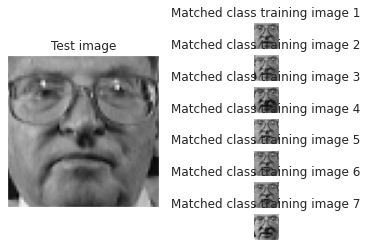

In [74]:
%matplotlib inline
X,y,pcadim = fetchDataset('olivetti') # fetch the olivetti data
xTr,yTr,xTe,yTe,trIdx,teIdx = trteSplitEven(X,y,0.7) # split into training and testing
pca = decomposition.PCA(n_components=20) # use PCA to reduce the dimension to 20
pca.fit(xTr) # use training data to fit the transform
xTrpca = pca.transform(xTr) # apply on training data
xTepca = pca.transform(xTe) # apply on test data
# use our pre-defined decision tree classifier together with the implemented
# boosting to classify data points in the training data
classifier = BayesClassifier().trainClassifier(xTrpca, yTr)
yPr = classifier.classify(xTepca)
# choose a test point to visualize
testind = random.randint(0, xTe.shape[0]-1)
# visualize the test point together with the training points used to train
# the class that the test point was classified to belong to
visualizeOlivettiVectors(xTr[yTr == yPr[testind],:], xTe[testind,:])